In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
benin = pd.read_csv('../data/benin-malanville_clean.csv')
benin['Country'] = 'Benin'

sierraleone = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
sierraleone['Country'] = 'Sierra Leone'

togo = pd.read_csv('../data/togo-dapaong_clean.csv')
togo['Country'] = 'Togo'

# Metric Comparison

In [17]:


df_clean = pd.concat([benin, sierraleone, togo], ignore_index=True)

In [18]:
df_melted = df_clean.melt(id_vars='Country', value_vars=['GHI', 'DNI', 'DHI'],
                          var_name='Metric', value_name='Value')

<Axes: xlabel='Metric', ylabel='Value'>

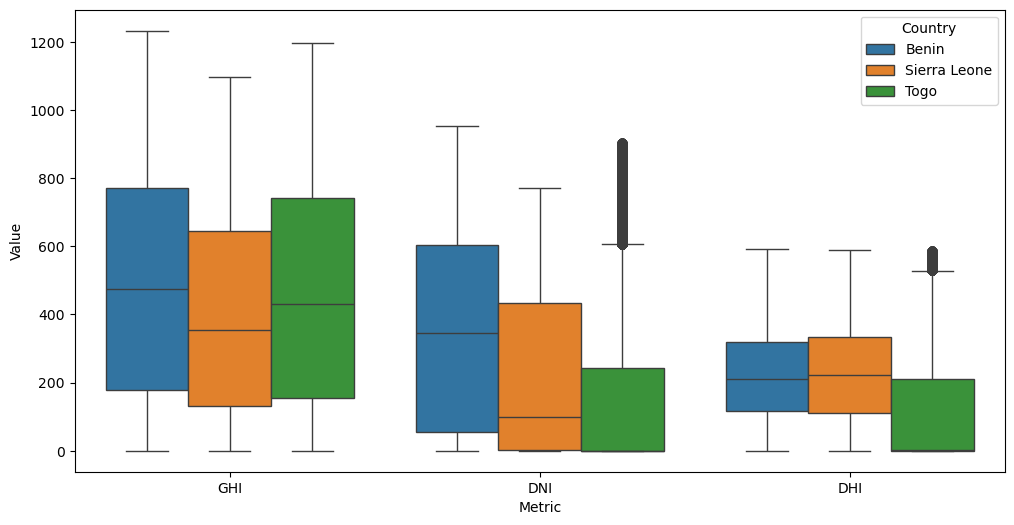

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Metric', y='Value', hue='Country')

## Summary Table 

In [20]:
summary_table = df_clean.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

In [21]:
print(summary_table)

                     GHI                            DNI                      \
                    mean median         std        mean  median         std   
Country                                                                       
Benin         476.477999  474.0  320.293849  352.575567  345.70  280.657284   
Sierra Leone  399.012548  355.3  297.197382  218.617567   98.05  244.926610   
Togo          453.177148  429.6  318.146236  149.671384    0.00  248.715008   

                     DHI                     
                    mean median         std  
Country                                      
Benin         225.162167  210.6  143.824953  
Sierra Leone  228.204165  222.7  143.465140  
Togo          113.127457    1.8  151.524684  


(Bonus) Visual Summary

In [22]:
GHI_avg = df_clean.groupby('Country')['GHI'].mean().sort_values(ascending=False).reset_index()

/tmp/ipykernel_212989/2844517979.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=GHI_avg, x='GHI', y='Country', palette='viridis')


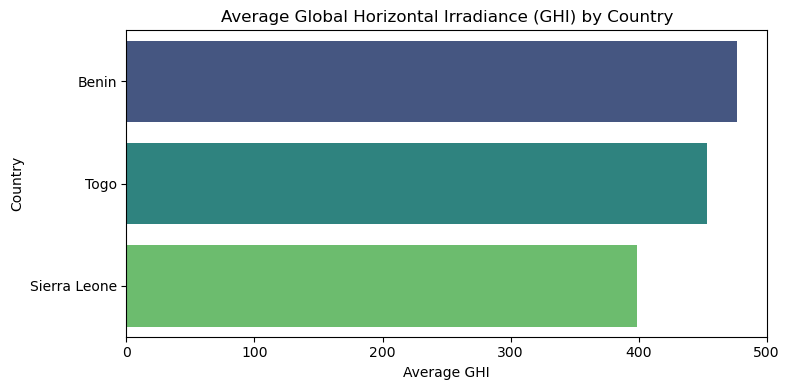

In [24]:

plt.figure(figsize=(8, 4))
sns.barplot(data=GHI_avg, x='GHI', y='Country', palette='viridis')
plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.title("Average Global Horizontal Irradiance (GHI) by Country")
plt.tight_layout()
plt.show()